## This projects used the following dataset: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews

## It consists of two CSV files which will be joined together in this code

## The goal of this analysis is to find interesting insights to visualize about books and how people review them

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_rows', 40)


In [3]:
df = pd.read_csv("books_data.csv")
df2 = pd.read_csv("Books_rating.csv")


In [4]:
df["Title"] = df["Title"].str.lower().str.strip()
df["authors"] = df["authors"].str.lower().str.strip()
df2["Title"] = df2["Title"].str.lower().str.strip()

## Merging the two datasets

In [5]:
merged = df.merge(df2, how="inner", on="Title")

## Check distribution of review scores

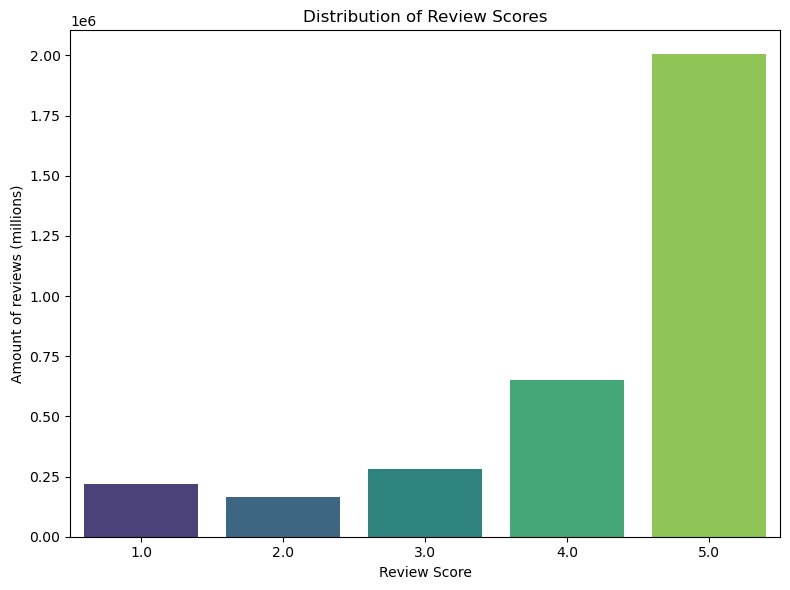

In [6]:
# Group and count the values
score_counts = merged.groupby("review/score")["Title"].count().reset_index()
score_counts.columns = ['Review Score', 'Count']

# Create a Seaborn bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Review Score', y='Count', data=score_counts, palette="viridis")

ax.set_title("Distribution of Review Scores")
ax.set_xlabel("Review Score")
ax.set_ylabel("Amount of reviews (millions)")

plt.tight_layout()
plt.show()

In [7]:
merged['review/time'] = pd.to_datetime(merged['review/time'], unit='s')


In [8]:
merged

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,Id,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,its only art if its well hung!,NaN,['julie strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN,1882931173,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,1999-10-23,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,dr. seuss: american icon,Philip Nel takes a fascinating look into the k...,['philip nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,2004-09-21,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,dr. seuss: american icon,Philip Nel takes a fascinating look into the k...,['philip nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,2004-03-09,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,dr. seuss: american icon,Philip Nel takes a fascinating look into the k...,['philip nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,2004-07-25,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,dr. seuss: american icon,Philip Nel takes a fascinating look into the k...,['philip nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,2005-02-10,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3320448,the autograph man,Alex-Li Tandem sells autographs. His business ...,['zadie smith'],http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,Vintage,2003-08-12,https://play.google.com/store/books/details?id...,['Fiction'],19.0,1402508735,34.99,A2UDBTV5ULMCFF,"Flotte Lotte ""Flolo""",0/1,2.0,2005-11-14,Hard work,"Reading the first book of ""The Autograph Man"" ..."
3320449,student's solutions manual for johnson/mowry's...,Discover the many ways mathematics is relevant...,"['david b. johnson', 'thomas a. mowry']",http://books.google.com/books/content?id=dehfP...,http://books.google.com/books?id=dehfPgAACAAJ&...,Brooks/Cole Publishing Company,1998-01-01,http://books.google.com/books?id=dehfPgAACAAJ&...,NaN,NaN,0534400604,NaN,A1EF8V661HR2B5,scheye1,1/1,2.0,2011-11-05,Worst math book ever,Having a teacher that loved this book didn't h...
3320450,student's solutions manual for johnson/mowry's...,Discover the many ways mathematics is relevant...,"['david b. johnson', 'thomas a. mowry']",http://books.google.com/books/content?id=dehfP...,http://books.google.com/books?id=dehfPgAACAAJ&...,Brooks/Cole Publishing Company,1998-01-01,http://books.google.com/books?id=dehfPgAACAAJ&...,NaN,NaN,0534400604,NaN,AE68PS07IST7I,Ian Klor,1/3,5.0,2008-08-28,Excellant Math Book,"This book is well written and easy to use, wel..."
3320451,student's solutions manual for johnson/mowry's...,Discover the many ways mathematics is relevan

In [9]:
df = merged.copy()

In [10]:
df = df.reset_index()

In [11]:
# Remove rows where the review time is wrong (dates before the official first day)
df = df.loc[df["review/time"] > "1995-01-01"]

In [12]:
df.set_index('review/time', inplace=True)

## Review scores over time

/var/folders/qx/b5gv5rk134n7fsjg968xynj40000gn/T/ipykernel_31342/1563867060.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_avg = df.resample('Y').mean()


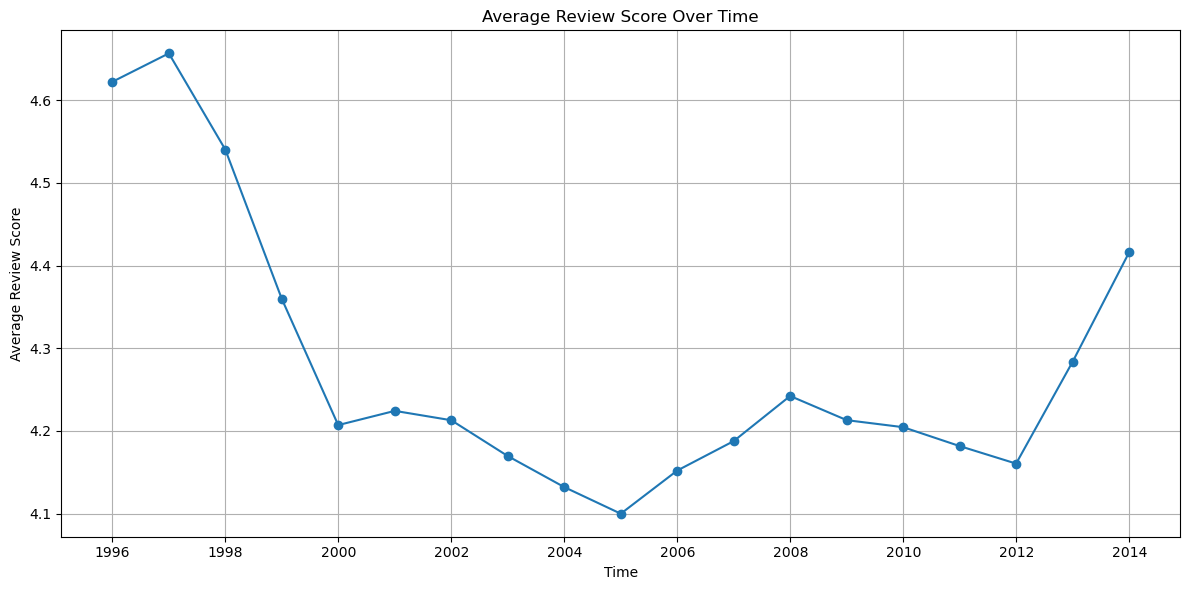

In [13]:

# Resample data by month and compute average review score
monthly_avg = df.resample('Y').mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(monthly_avg.index, monthly_avg['review/score'], marker='o')
plt.title('Average Review Score Over Time')
plt.xlabel('Time')
plt.ylabel('Average Review Score')
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
df.reset_index(inplace=True)

In [15]:
df.columns

Index(['review/time', 'index', 'Title', 'description', 'authors', 'image',
       'previewLink', 'publisher', 'publishedDate', 'infoLink', 'categories',
       'ratingsCount', 'Id', 'Price', 'User_id', 'profileName',
       'review/helpfulness', 'review/score', 'review/summary', 'review/text'],
      dtype='object')

## Adding and changing columns

In [16]:
df['helpful_votes'], df['total_votes'] = zip(*df['review/helpfulness'].str.split('/').tolist())
df['helpful_votes'] = df['helpful_votes'].astype(int)
df['total_votes'] = df['total_votes'].astype(int)

# Calculate the helpfulness ratio
df['helpfulness_ratio'] = df['helpful_votes'] / df['total_votes']

# Handle potential NaN values (when total_votes is 0)
df['helpfulness_ratio'].fillna(0, inplace=True)

In [17]:
df["Title"] = df["Title"].str.lower().str.strip()

## Create a limited DF books with at least 50 reviews

In [18]:
book_stats = df.groupby('Title').agg(
    average_rating=('review/score', 'mean'),
    review_count=('review/score', 'size'),
    avg_helpfulness=('helpfulness_ratio', 'mean'),
    rating_std_dev=('review/score', 'std')
)

# Filter out books with fewer than 50 reviews
filtered_books = book_stats[book_stats['review_count'] >= 50]

# Sort books by average rating, for example
sorted_books = filtered_books.sort_values(by='average_rating', ascending=False)



In [19]:
sorted_books.reset_index(inplace=True)

In [20]:
sorted_books

,Title,average_rating,review_count,avg_helpfulness,rating_std_dev
0,springs in the valley,5.000000,86,0.451885,0.000000
1,lilla belle: the first stages,5.000000,113,0.043510,0.000000
2,breaking and training the stock horse,5.000000,64,0.750000,0.000000
3,the complete book of garden magic,5.000000,50,0.600000,0.000000
4,alvin's secret code,5.000000,72,0.833333,0.000000
...,...,...,...,...,...
8693,irresistible forces (danielle steel),2.018349,109,0.709586,1.319243
8694,predator (kay scarpetta mysteries),1.840085,469,0.755774,1.253206
8695,"crossroads of twilight (the wheel of time, boo...",1.802454,2526,0.668883,1.247639
8696,daddy was the black dahlia killer: the identit...,1.754098,61,0.816457,1.374236


In [21]:
sorted_books.reset_index(inplace=True)

## Finding the most controversial books (high standard deviation of review scores)

/var/folders/qx/b5gv5rk134n7fsjg968xynj40000gn/T/ipykernel_31342/2346767772.py:19: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


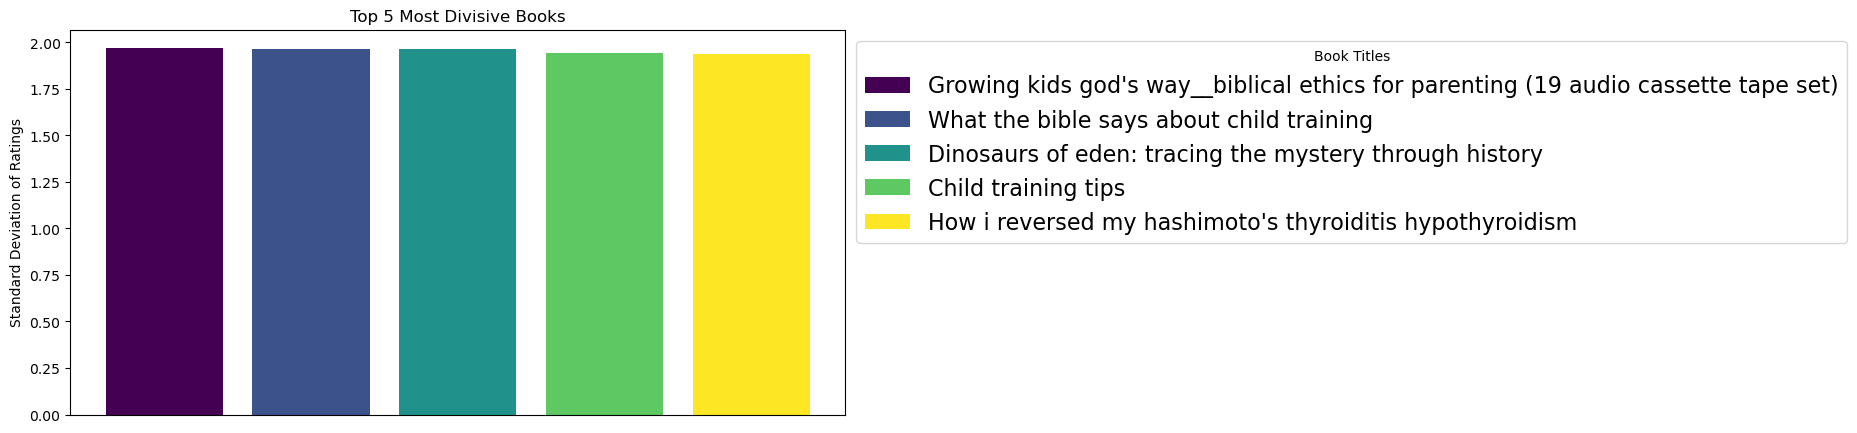

In [22]:
sorted_by_std = sorted_books.sort_values(by='rating_std_dev', ascending=False)

# Top 10
top_5_divisive = sorted_by_std.head(5)

colors = plt.cm.viridis(np.linspace(0, 1, len(top_5_divisive)))

plt.figure(figsize=(10, 5))
bars = plt.bar(range(len(top_5_divisive)), top_5_divisive['rating_std_dev'], color=colors)

# Attach a label (title) to each bar for the legend
for bar, title in zip(bars, top_5_divisive['Title'].str.capitalize()):
    bar.set_label(title)

plt.ylabel('Standard Deviation of Ratings')
plt.title('Top 5 Most Divisive Books')
plt.xticks([])  # This removes the x-axis tick labels
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=16, title="Book Titles")  # Places legend outside the plot
plt.tight_layout()
plt.show()

In [23]:
df.set_index('review/time', inplace=True)

## Examine amount of reviews over time

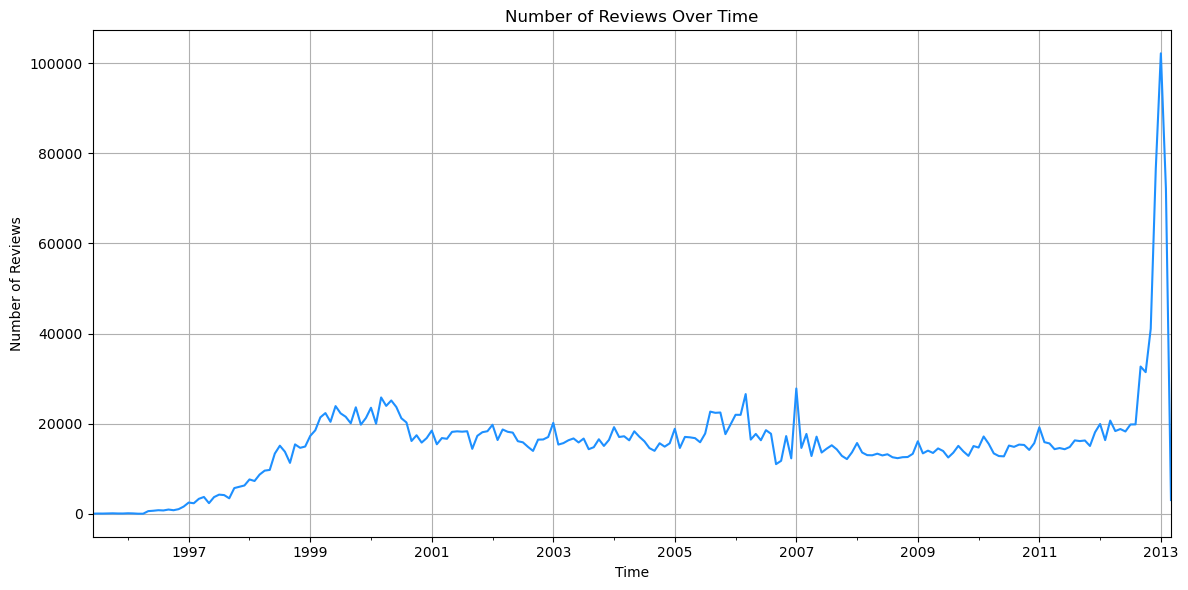

In [24]:
monthly_reviews = df.resample('M').size()  # Monthly resample with 'M'

# Plot
plt.figure(figsize=(12,6))
monthly_reviews.plot(kind='line', color='dodgerblue')
plt.title('Number of Reviews Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.tight_layout()
plt.show()


## Does christmas lead to spikes in reviews?

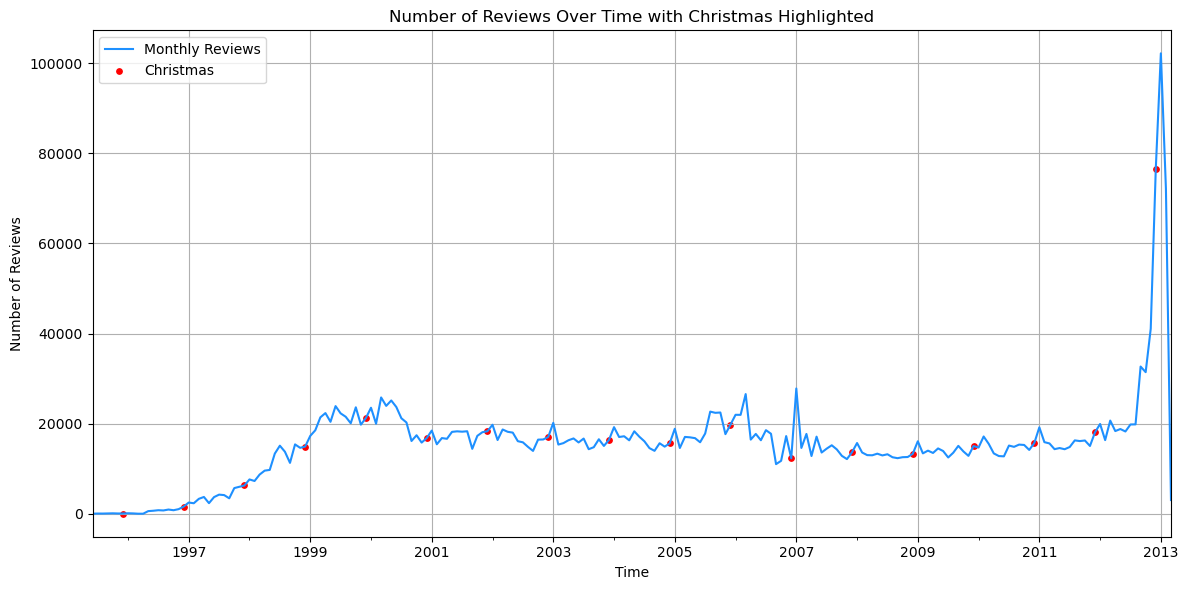

In [25]:
monthly_reviews = df.resample('M').size()

# Extract points corresponding to every December
christmas_reviews = monthly_reviews[monthly_reviews.index.month == 12]

# Plot
plt.figure(figsize=(12,6))
monthly_reviews.plot(kind='line', color='dodgerblue', linewidth=1.5, label='Monthly Reviews')  # Adjusted line width
plt.scatter(christmas_reviews.index, christmas_reviews.values, color='red', s=15, label='Christmas')  # Adjusted dot size
plt.title('Number of Reviews Over Time with Christmas Highlighted')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Violin chart of helpfulness review ratios (are the opinions of reviews often split or not)

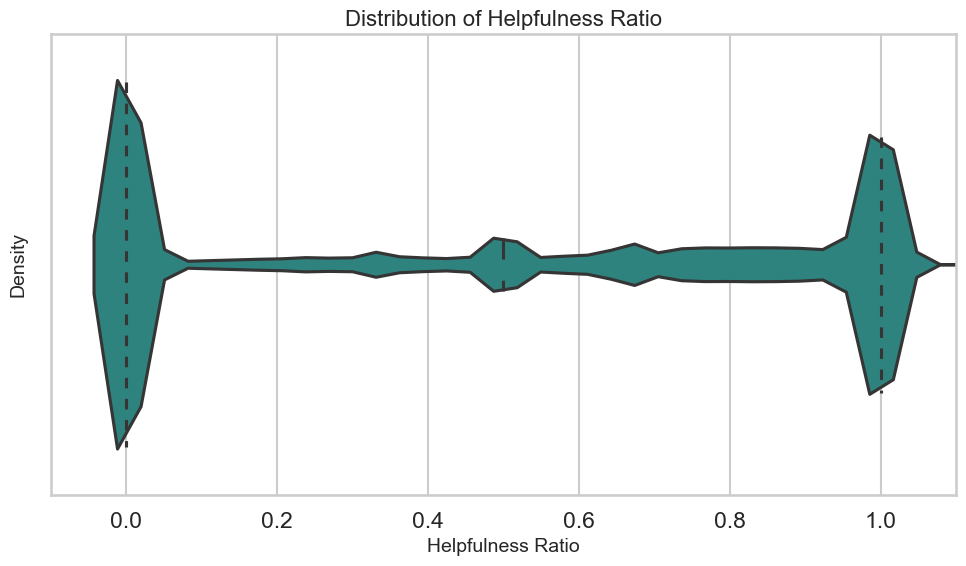

In [26]:

sns.set_style("whitegrid")
sns.set_context("talk")

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x=df['helpfulness_ratio'], spanmode = 'hard', inner="quartile", palette="viridis")

# Adding titles and labels
plt.title('Distribution of Helpfulness Ratio', fontsize=16)
plt.xlabel('Helpfulness Ratio', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Control the width of the plot for better visibility
ax.set_xlim(-0.1, 1.1)

# Display the plot
plt.tight_layout()
plt.show()

## Filter those with less than 5 reviews, can scew the chart

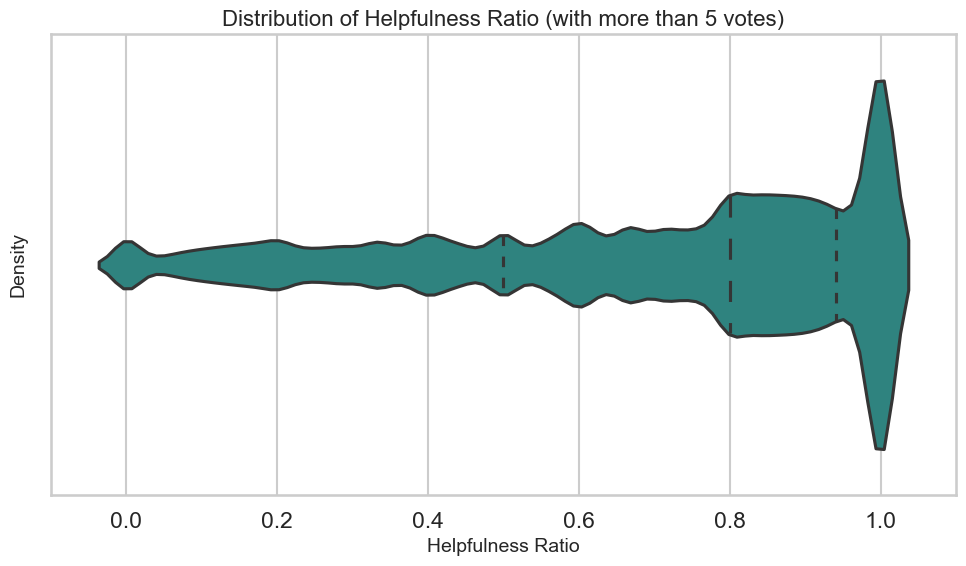

In [27]:
filtered_df = df[df['total_votes'] >= 5]

# Create the plot using the filtered dataframe
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x=filtered_df['helpfulness_ratio'], spanmode='hard', inner="quartile", palette="viridis")

# Adding titles and labels
plt.title('Distribution of Helpfulness Ratio (with more than 5 votes)', fontsize=16)
plt.xlabel('Helpfulness Ratio', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Control the width of the plot for better visibility
ax.set_xlim(-0.1, 1.1)

# Display the plot
plt.tight_layout()
plt.show()